In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data 

dunking_data = pd.read_csv('data/dunking-data.csv')
microscopy_data = pd.read_csv('data/microscopy-data.csv')
tr1_data = pd.read_csv('data/tr-1.csv')
tr2_data = pd.read_csv('data/tr-2.csv')
tr3_data = pd.read_csv('data/tr-3.csv')

# Constants
tea_surface_tension = 6.78e-2  # N m−1
contact_angle = 1.45  # rad
tea_dynamic_viscosity = 9.93e-4  # Pa s

tr1_data['eta'] = tea_dynamic_viscosity
tr1_data['gamma'] = tea_surface_tension
tr1_data['phi'] = contact_angle

tr2_data['eta'] = tea_dynamic_viscosity
tr2_data['gamma'] = tea_surface_tension
tr2_data['phi'] = contact_angle

tr3_data['eta'] = tea_dynamic_viscosity
tr3_data['gamma'] = tea_surface_tension
tr3_data['phi'] = contact_angle

## Microscopy data is a subset of Dunking data
# Check similar entries in the datasets 

In [26]:
# Merge the two dataframes on the common columns
microscopy_labeled = pd.merge(dunking_data, microscopy_data, on=['L', 'eta', 'phi', 't', 'gamma'])
microscopy_labeled 

,gamma,phi,eta,L,t,biscuit,r
0,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,7.797961e-07
1,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,8.189772e-07
2,0.062276,1.520534,0.001005,0.004030,28.423407,Hobnob,3.639434e-07
3,0.075264,1.487706,0.001003,0.004726,21.984085,Rich Tea,3.198697e-07
4,0.073130,1.554126,0.000995,0.002234,27.632784,Rich Tea,2.973448e-07
...,...,...,...,...,...,...,...
495,0.070954,1.447903,0.000996,0.005560,17.524261,Hobnob,4.176549e-07
496,0.060301,1.466961,0.001004,0.004119,17.604523,Rich Tea,3.187500e-07
497,0.071658,1.303051,0.001003,0.008497,24.070251,Rich Tea,3.194081e-07
498,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive,7.453712e-07


biscuit
Digestive    1000
Hobnob       1000
Rich Tea     1000
Name: count, dtype: int64


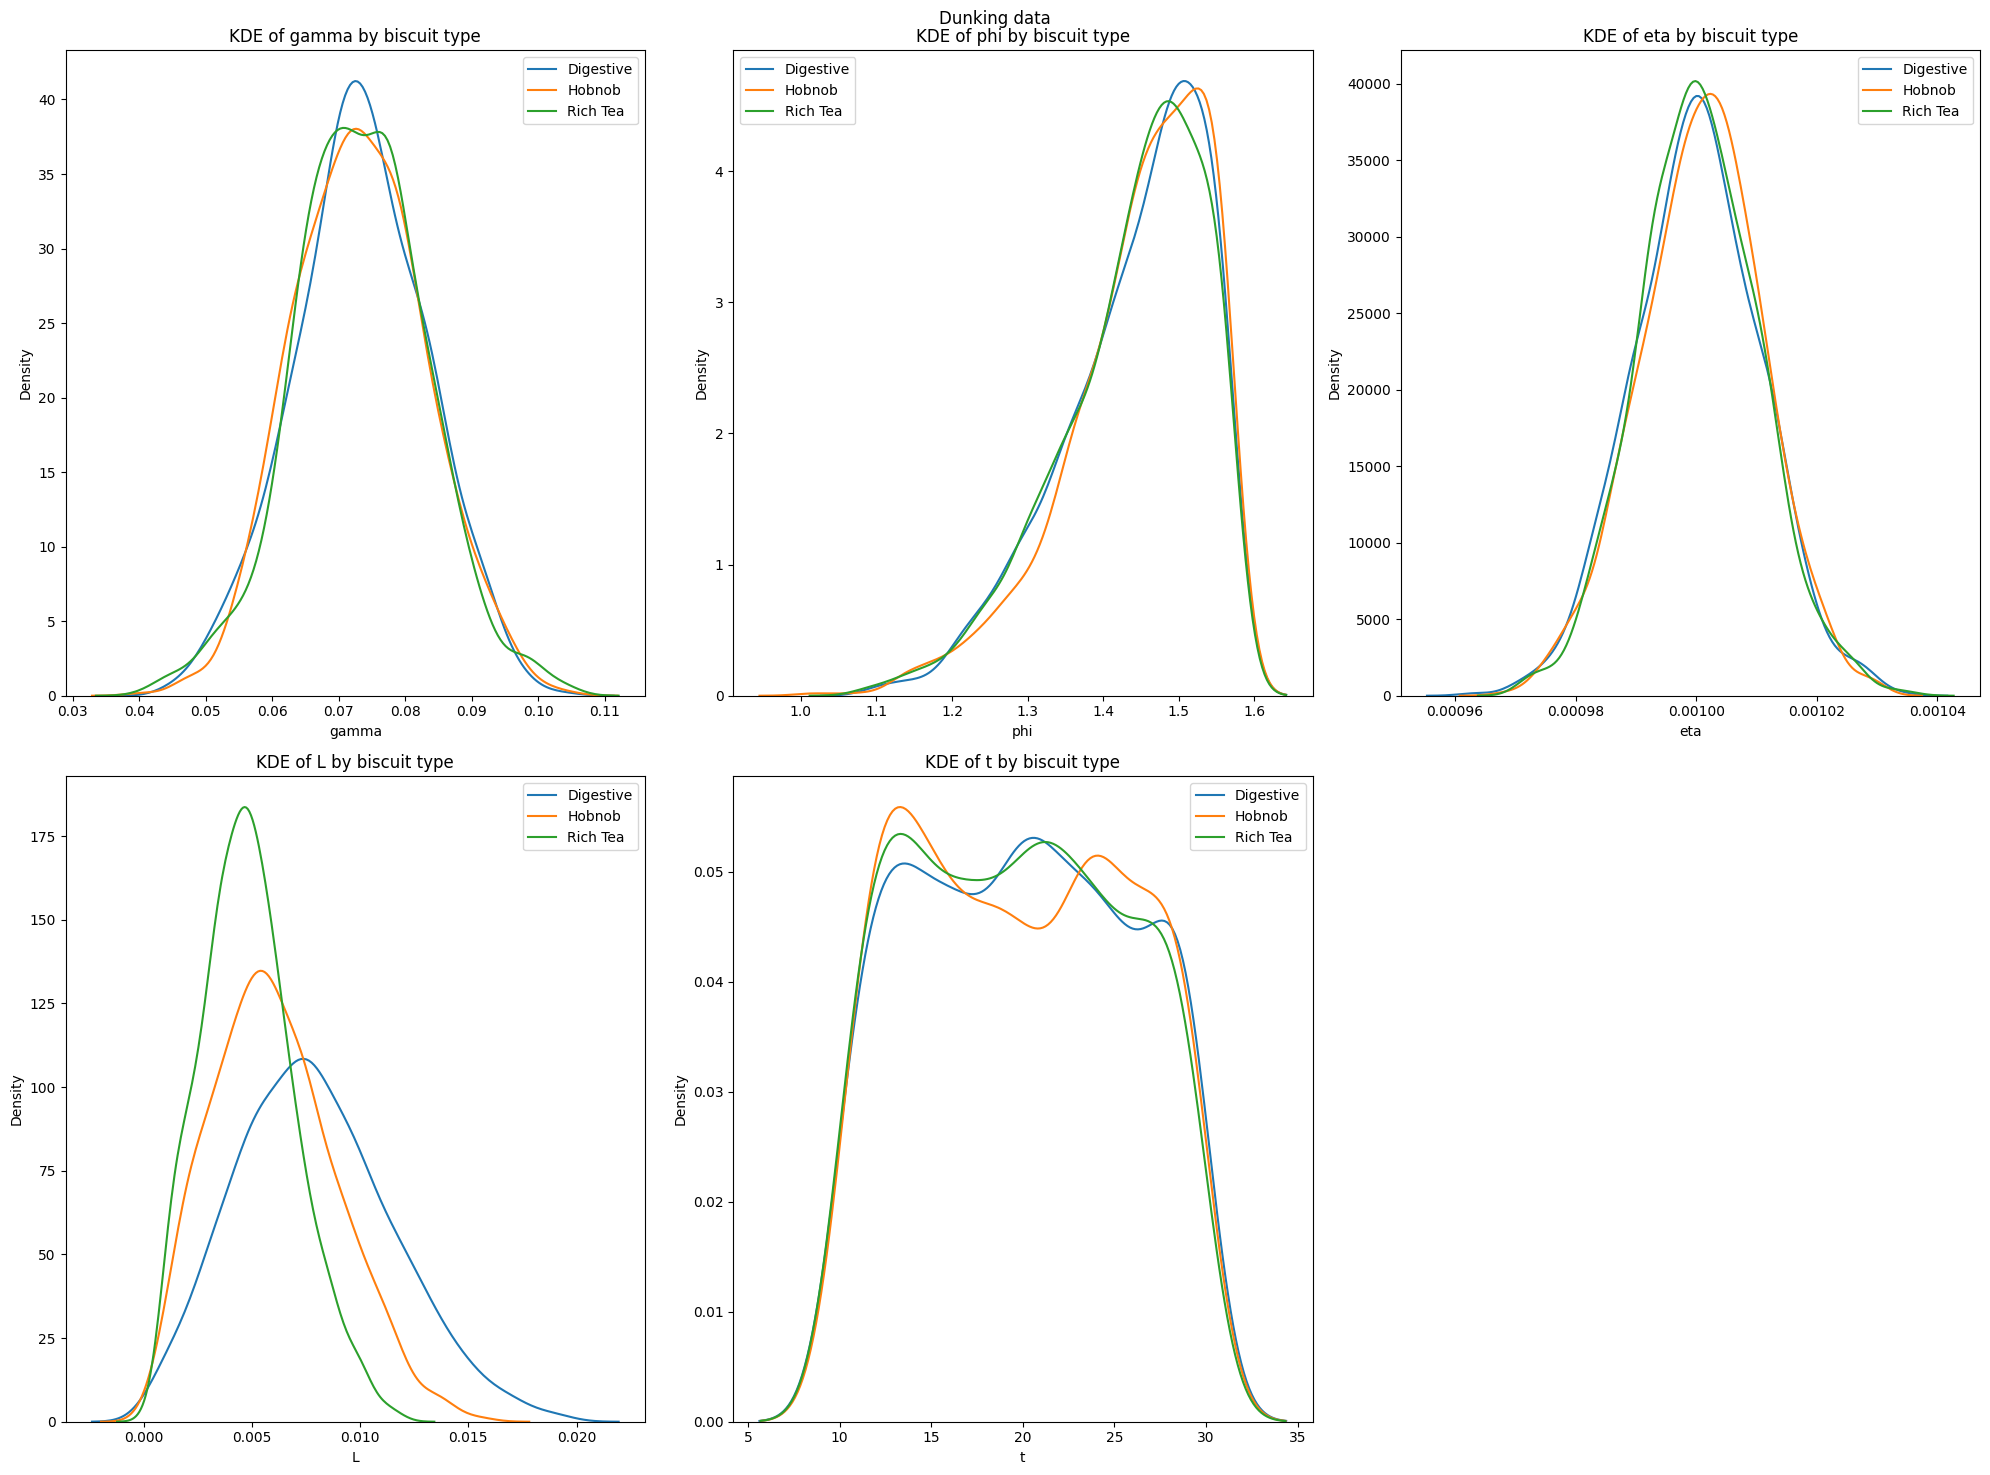

In [32]:
# Check the number of biscuits in each type from dunking_data
biscuit_counts = dunking_data['biscuit'].value_counts()
print(biscuit_counts)

# Get the list of numerical columns
num_cols = dunking_data.select_dtypes(include=['float64', 'int64']).columns

# Create a 3x2 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array to make indexing easier
axs = axs.flatten()

# Plot KDE for each numerical column
for i, col in enumerate(num_cols[:5]):
    for biscuit_type in dunking_data['biscuit'].unique():
        sns.kdeplot(dunking_data[dunking_data['biscuit'] == biscuit_type][col], ax=axs[i], label=biscuit_type)
    axs[i].set_title(f'KDE of {col} by biscuit type')
    axs[i].legend()

# Remove the last (empty) subplot
fig.delaxes(axs[-1])

plt.suptitle("Dunking data")

plt.tight_layout()
plt.show()

biscuit
Rich Tea     169
Digestive    168
Hobnob       163
Name: count, dtype: int64


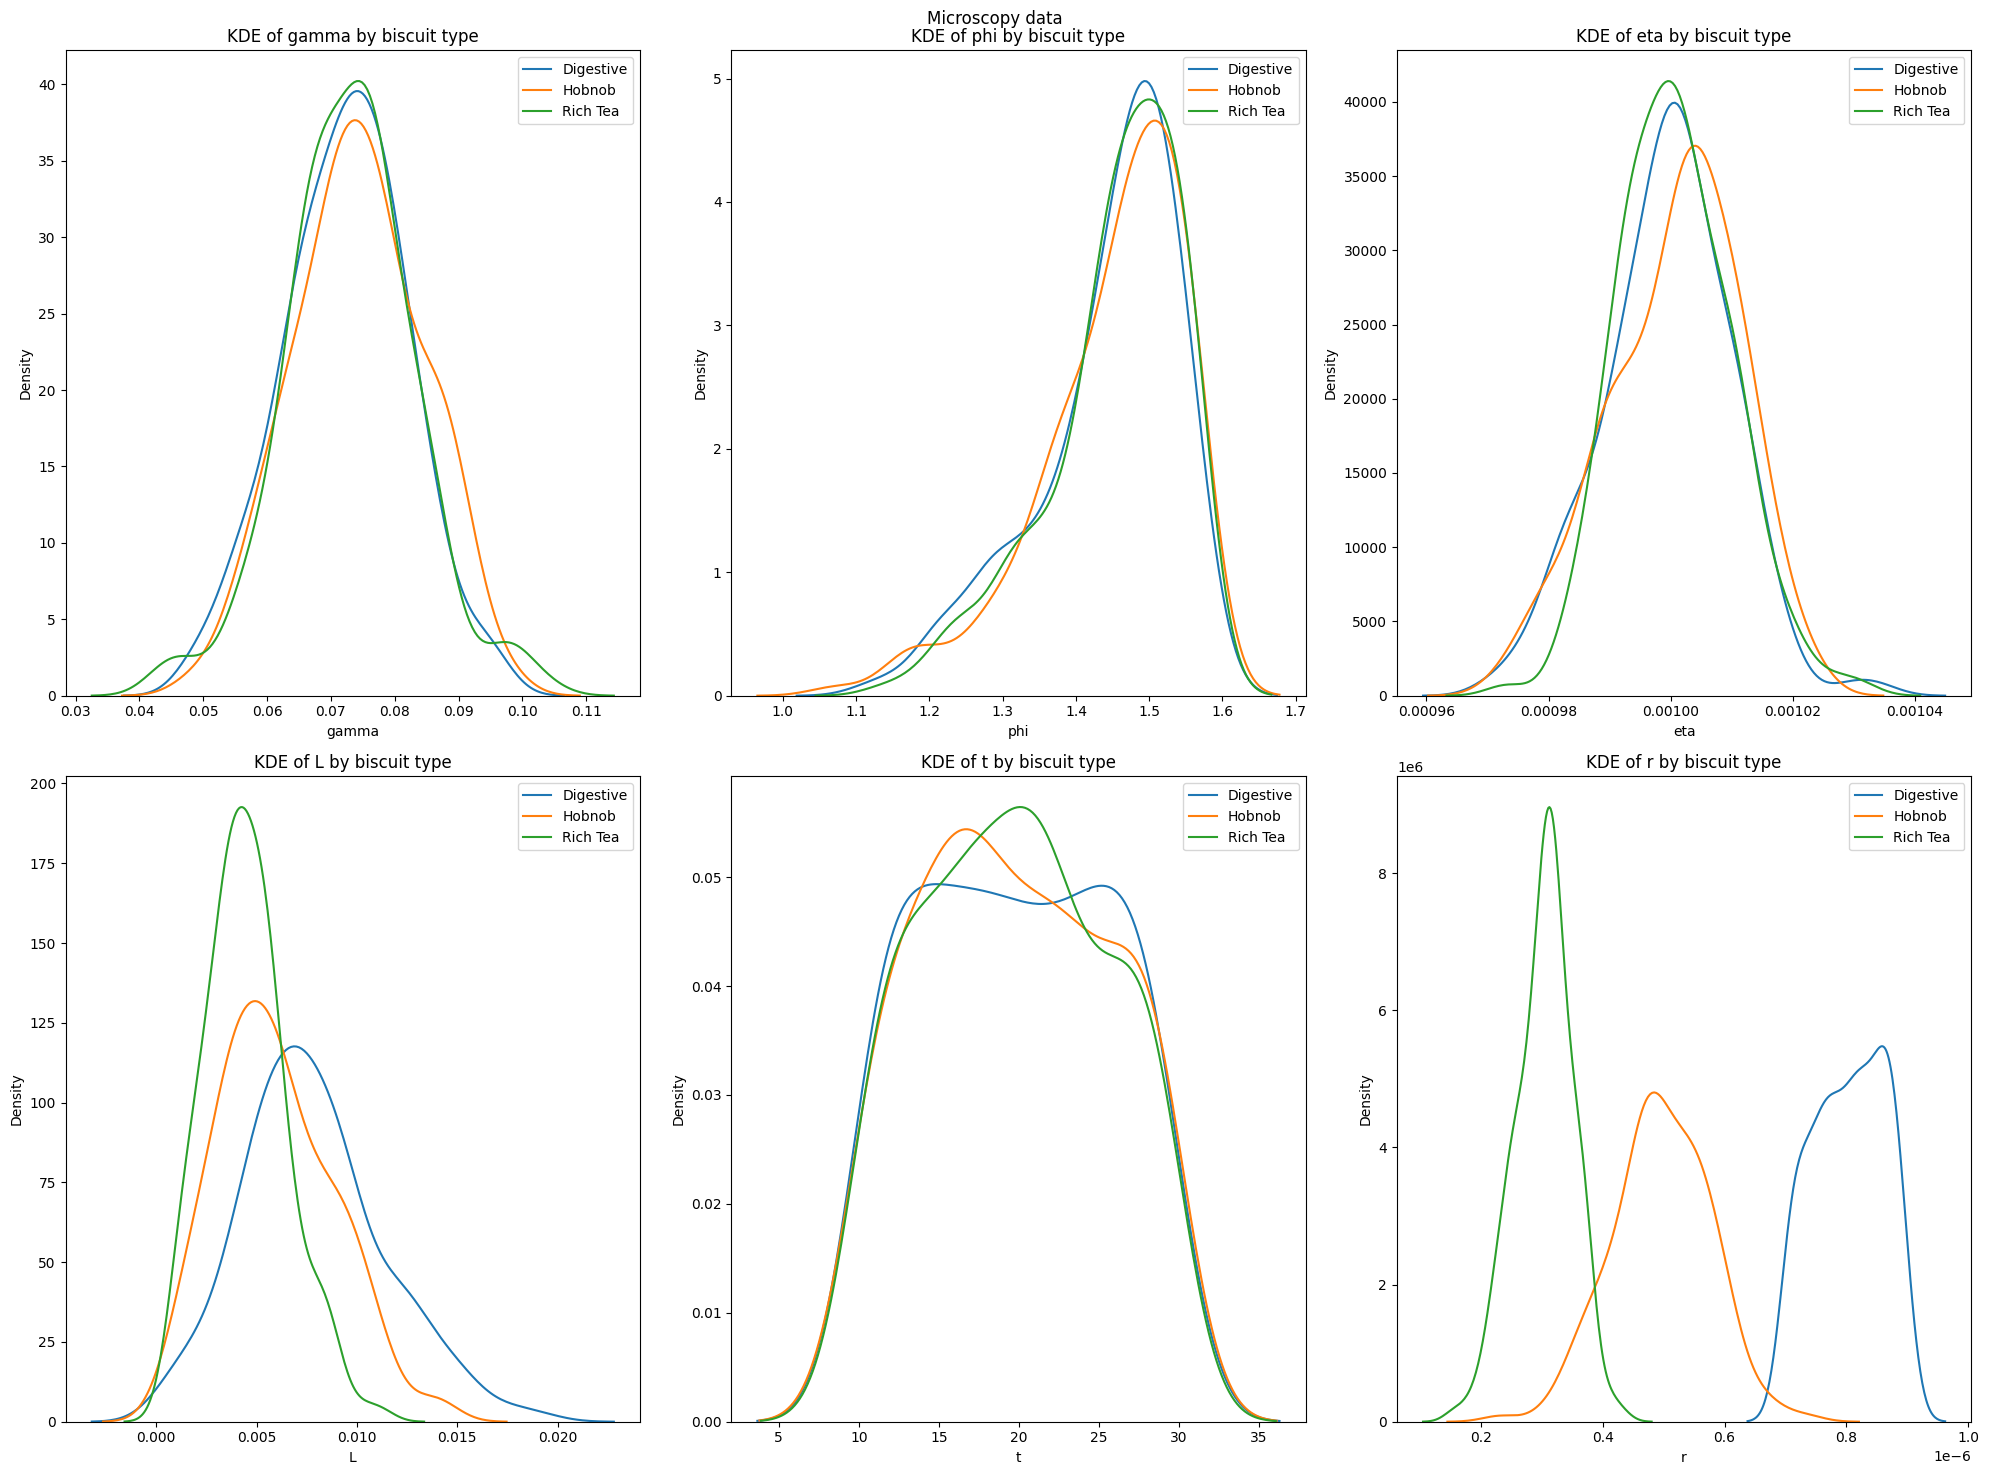

In [33]:
# Check the number of biscuits in each type
biscuit_counts = microscopy_labeled['biscuit'].value_counts()
print(biscuit_counts)

# Get the list of numerical columns
num_cols = microscopy_labeled.select_dtypes(include=['float64', 'int64']).columns

# Create a 3x2 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array to make indexing easier
axs = axs.flatten()

# Plot KDE for each numerical column
for i, col in enumerate(num_cols):
    for biscuit_type in microscopy_labeled['biscuit'].unique():
        sns.kdeplot(microscopy_labeled[microscopy_labeled['biscuit'] == biscuit_type][col], ax=axs[i], label=biscuit_type)
    axs[i].set_title(f'KDE of {col} by biscuit type')
    axs[i].legend()

plt.suptitle("Microscopy data")
plt.tight_layout()
plt.show()

In [47]:
# Prune outliers on boxplots of radius by biscuit type

def remove_outliers(group):
    Q1 = group['r'].quantile(0.25)
    Q3 = group['r'].quantile(0.75)
    IQR = Q3 - Q1
    mask = (group['r'] >= (Q1 - 1.5 * IQR)) & (group['r'] <= (Q3 + 1.5 * IQR))
    return group[mask]

df_no_outliers = microscopy_labeled.groupby('biscuit').apply(remove_outliers)
df_no_outliers.reset_index(drop=True, inplace=True)
df_no_outliers

,gamma,phi,eta,L,t,biscuit,r
0,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,7.797961e-07
1,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,8.189772e-07
2,0.070943,1.414721,0.000993,0.007034,11.121606,Digestive,7.930241e-07
3,0.062258,1.377487,0.000996,0.006762,10.031548,Digestive,7.693137e-07
4,0.083265,1.500014,0.001015,0.006188,16.631355,Digestive,8.343526e-07
...,...,...,...,...,...,...,...
489,0.077401,1.499299,0.000993,0.003516,12.019737,Rich Tea,3.704851e-07
490,0.046098,1.562215,0.000987,0.001276,25.022570,Rich Tea,3.284792e-07
491,0.076069,1.392407,0.001009,0.005850,14.213099,Rich Tea,3.485692e-07
492,0.060301,1.466961,0.001004,0.004119,17.604523,Rich Tea,3.187500e-07


In [17]:
# How accurate is the Washburn equation? 
# How accurate is the Washburn equation for pore radius estimation?
# Can pore radius be used to determine the biscuit type? 


,gamma,phi,eta,L,t,r
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,0.073197,1.448925,0.001000,0.006070,19.757165,5.344857e-07
std,0.009956,0.095581,0.000010,0.003180,5.803528,2.163520e-07
min,0.043428,1.072712,0.000971,0.000483,10.013910,1.562959e-07
25%,0.066741,1.404303,0.000993,0.003843,14.844579,3.278206e-07
50%,0.073391,1.471977,0.001001,0.005550,19.846801,4.938002e-07
75%,0.079266,1.520274,0.001007,0.007904,24.767974,7.572568e-07
max,0.103439,1.570269,0.001034,0.019009,29.934807,8.991764e-07


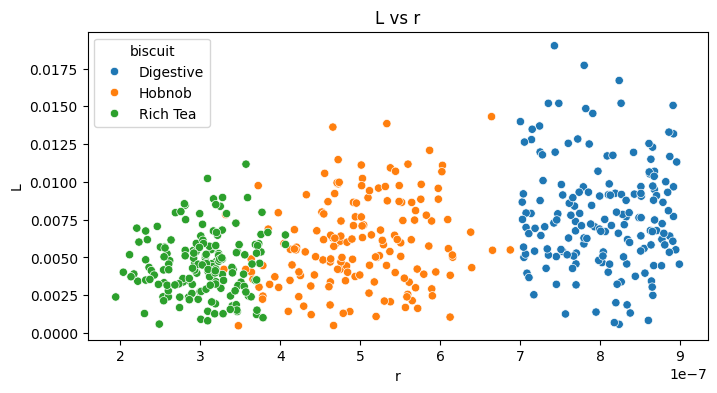

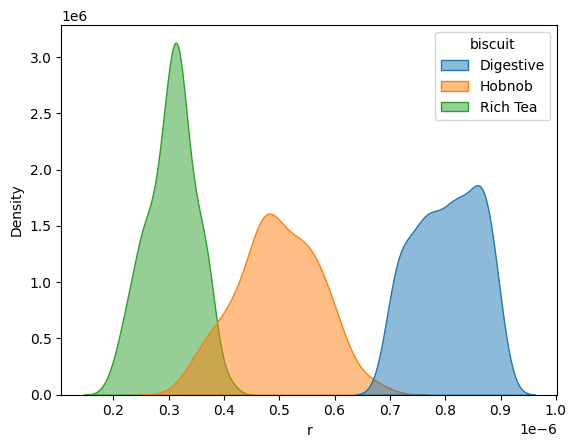

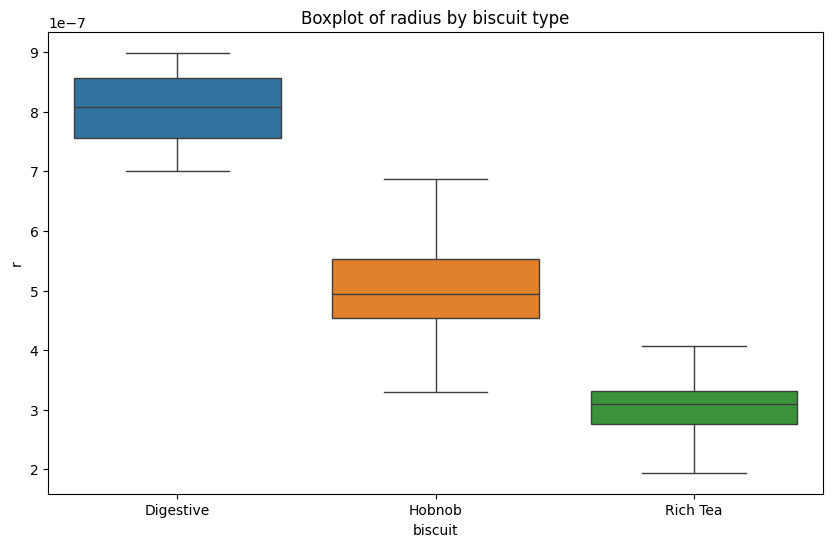

In [62]:
# Plot L vs r by biscuit type

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_no_outliers, x='r', y='L', hue='biscuit')
plt.title('L vs r')
plt.show()

# KDE plot of radius by biscuit type

sns.kdeplot(data=df_no_outliers, x='r', fill=True, levels=5, hue="biscuit", alpha=0.5)

# Boxplot of radius by biscuit type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='biscuit', y='r', hue='biscuit')
plt.title('Boxplot of radius by biscuit type')
plt.show()
